<a href="https://colab.research.google.com/github/jannat-349/ML-Lab-codes/blob/stroke-prediction-project-XGBoost/BrainStrokePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
data=pd.read_csv('/content/sample_data/stroke_prediction_dataset.csv')

In [ ]:
data.head()

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                15000 non-null  int64  
 1   Patient Name              15000 non-null  object 
 2   Age                       15000 non-null  int64  
 3   Gender                    15000 non-null  object 
 4   Hypertension              15000 non-null  int64  
 5   Heart Disease             15000 non-null  int64  
 6   Marital Status            15000 non-null  object 
 7   Work Type                 15000 non-null  object 
 8   Residence Type            15000 non-null  object 
 9   Average Glucose Level     15000 non-null  float64
 10  Body Mass Index (BMI)     15000 non-null  float64
 11  Smoking Status            15000 non-null  object 
 12  Alcohol Intake            15000 non-null  object 
 13  Physical Activity         15000 non-null  object 
 14  Stroke

In [ ]:
data.isnull().sum() #checking for total null values

Patient ID                     0
Patient Name                   0
Age                            0
Gender                         0
Hypertension                   0
Heart Disease                  0
Marital Status                 0
Work Type                      0
Residence Type                 0
Average Glucose Level          0
Body Mass Index (BMI)          0
Smoking Status                 0
Alcohol Intake                 0
Physical Activity              0
Stroke History                 0
Family History of Stroke       0
Dietary Habits                 0
Stress Levels                  0
Blood Pressure Levels          0
Cholesterol Levels             0
Symptoms                    2500
Diagnosis                      0
dtype: int64

In [ ]:
#Dropping Null values
data = data.dropna(subset=['Symptoms'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12500 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                12500 non-null  int64  
 1   Patient Name              12500 non-null  object 
 2   Age                       12500 non-null  int64  
 3   Gender                    12500 non-null  object 
 4   Hypertension              12500 non-null  int64  
 5   Heart Disease             12500 non-null  int64  
 6   Marital Status            12500 non-null  object 
 7   Work Type                 12500 non-null  object 
 8   Residence Type            12500 non-null  object 
 9   Average Glucose Level     12500 non-null  float64
 10  Body Mass Index (BMI)     12500 non-null  float64
 11  Smoking Status            12500 non-null  object 
 12  Alcohol Intake            12500 non-null  object 
 13  Physical Activity         12500 non-null  object 
 14  Stroke

In [ ]:
#If we see any feature unrelated to label,
#we can just drop them before starting to EDA and preprocessing.

data = data.drop(["Patient ID", "Patient Name", "Marital Status","Work Type","Residence Type","Dietary Habits","Symptoms"], axis =1)


In [ ]:
data.head()

,Age,Gender,Hypertension,Heart Disease,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Diagnosis
0,56,Male,0,1,130.91,22.37,Non-smoker,Social Drinker,Moderate,0,Yes,3.48,140/108,"HDL: 68, LDL: 133",Stroke
1,80,Male,0,0,183.73,32.57,Non-smoker,Never,Low,0,No,1.73,146/91,"HDL: 63, LDL: 70",Stroke
2,26,Male,1,1,189.00,20.32,Formerly Smoked,Rarely,High,0,Yes,7.31,154/97,"HDL: 59, LDL: 95",Stroke
3,73,Male,0,0,185.29,27.50,Non-smoker,Frequent Drinker,Moderate,0,No,5.35,174/81,"HDL: 70, LDL: 137",No Stroke
4,51,Male,1,1,177.34,29.06,Currently Smokes,Rarely,Low,0,Yes,6.84,121/95,"HDL: 65, LDL: 68",Stroke


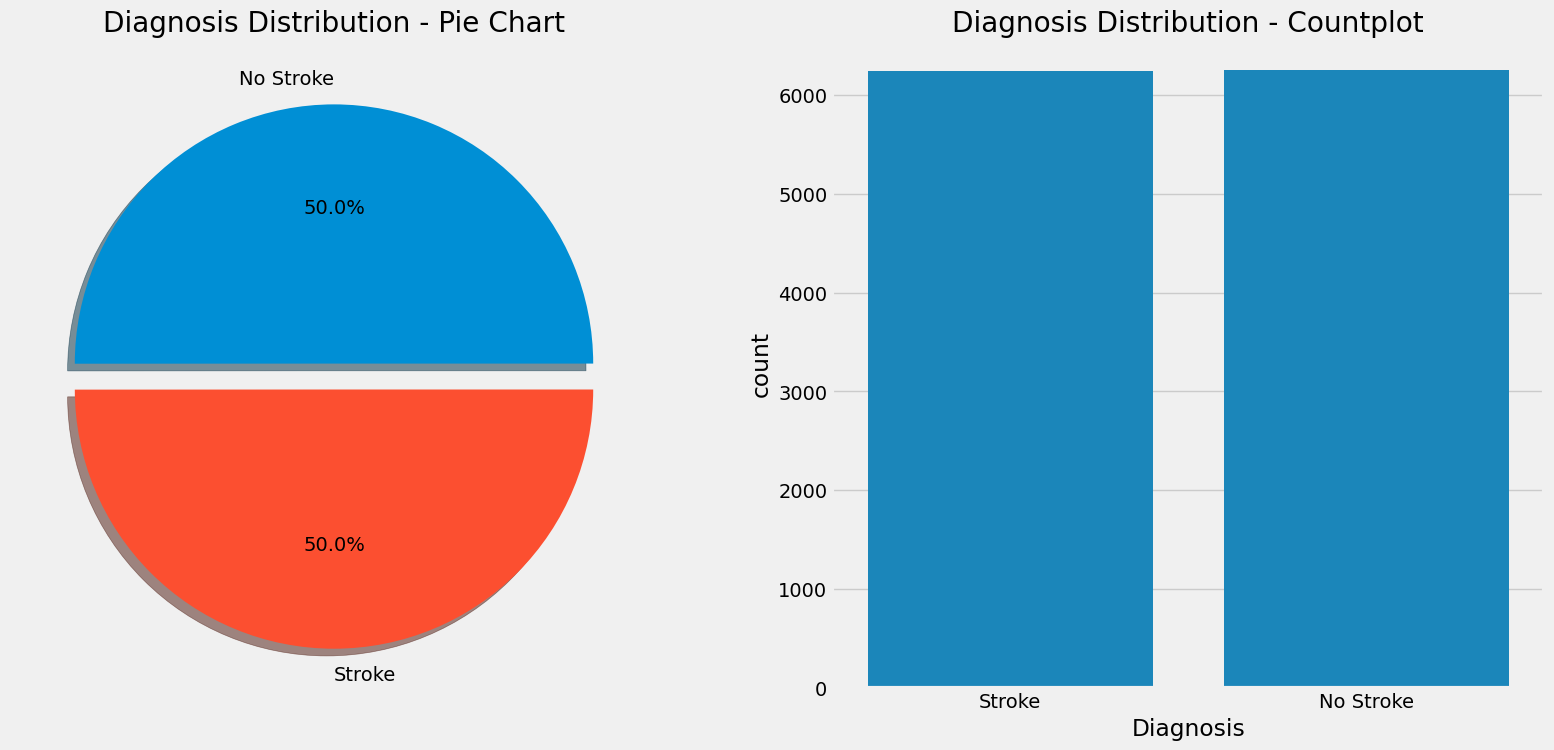

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart
data['Diagnosis'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Diagnosis Distribution - Pie Chart')
ax[0].set_ylabel('')

# Countplot
sns.countplot(x='Diagnosis', data=data, ax=ax[1])
ax[1].set_title('Diagnosis Distribution - Countplot')

plt.show()

In [ ]:
data.groupby(['Gender','Diagnosis'])['Diagnosis'].count()

Gender  Diagnosis
Female  No Stroke    3073
        Stroke       3066
Male    No Stroke    3178
        Stroke       3183
Name: Diagnosis, dtype: int64

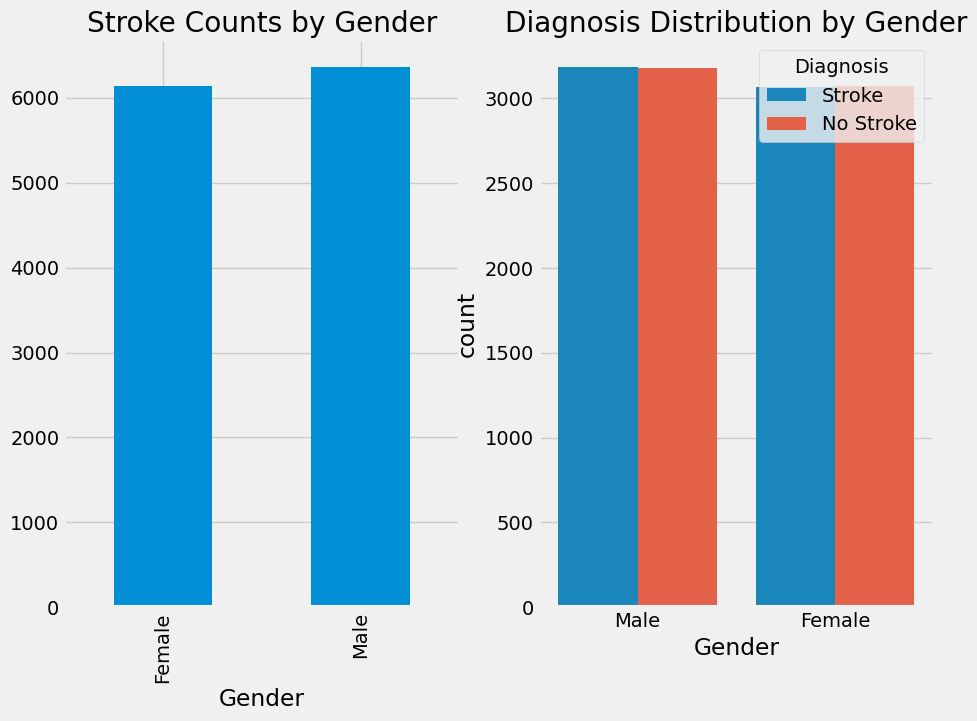

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(10, 7))

# Assuming 'Diagnosis' is the column you want to visualize
# Assuming 'Gender' is a categorical variable
data[['Gender', 'Diagnosis']].groupby(['Gender']).size().plot.bar(ax=ax[0])
ax[0].set_title('Stroke Counts by Gender')

sns.countplot(x='Gender', hue='Diagnosis', data=data, ax=ax[1])
ax[1].set_title('Diagnosis Distribution by Gender')

plt.show()

In [ ]:
data.groupby(['Hypertension','Diagnosis'])['Diagnosis'].count()

Hypertension  Diagnosis
0             No Stroke    4669
              Stroke       4741
1             No Stroke    1582
              Stroke       1508
Name: Diagnosis, dtype: int64

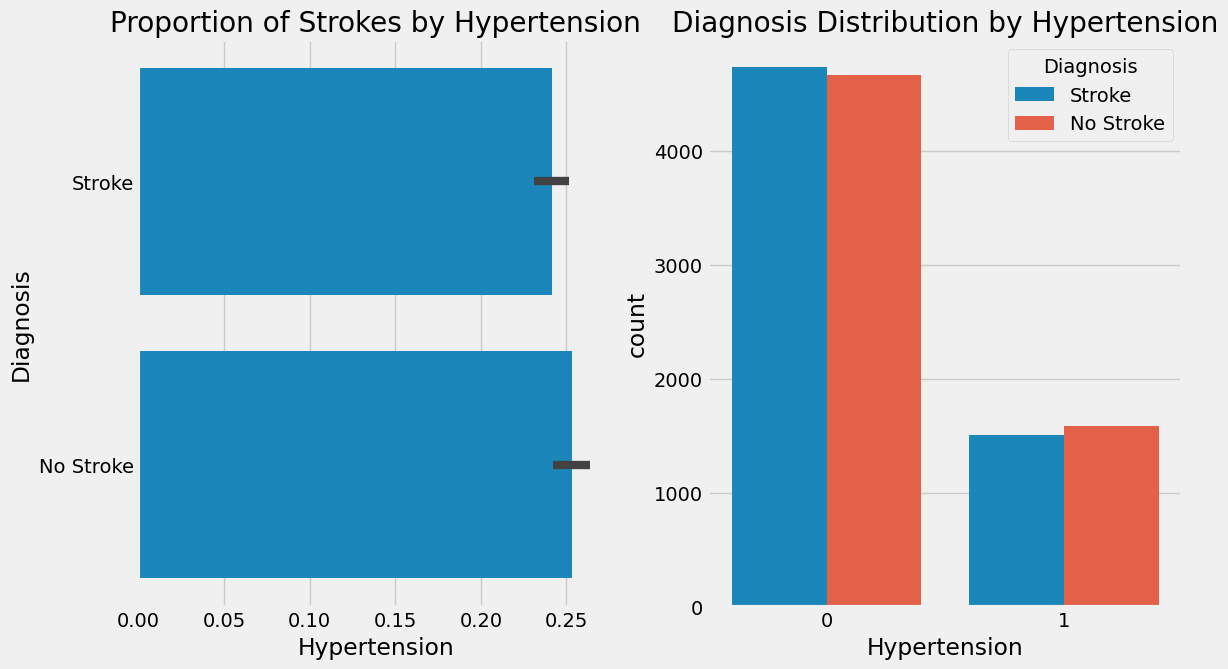

In [ ]:

f, ax = plt.subplots(1, 2, figsize=(12, 7))

# Bar plot showing the proportion of strokes for each Hypertension value
sns.barplot(x='Hypertension', y='Diagnosis', data=data, ax=ax[0])
ax[0].set_title('Proportion of Strokes by Hypertension')

# Countplot showing the distribution of Diagnosis for each Hypertension value
sns.countplot(x='Hypertension', hue='Diagnosis', data=data, ax=ax[1])
ax[1].set_title('Diagnosis Distribution by Hypertension')

plt.show()


In [ ]:
data.groupby(['Heart Disease','Diagnosis'])['Diagnosis'].count()

Heart Disease  Diagnosis
0              No Stroke    3093
               Stroke       3103
1              No Stroke    3158
               Stroke       3146
Name: Diagnosis, dtype: int64

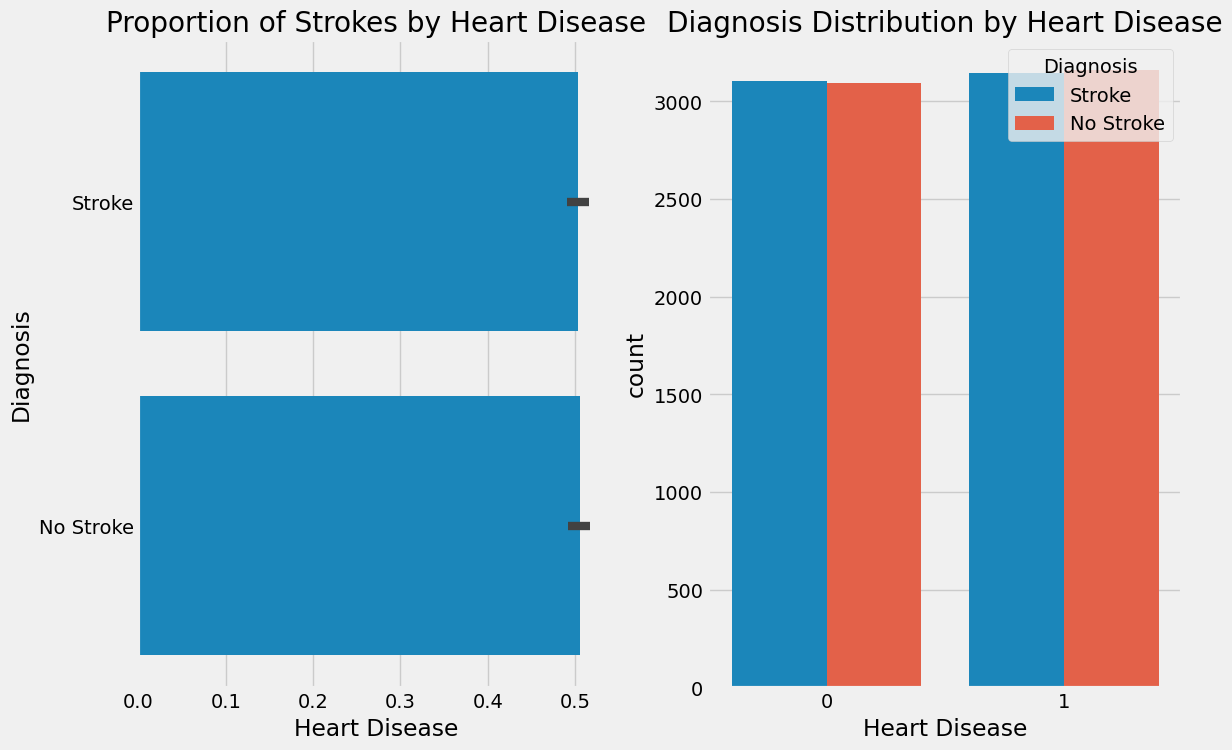

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12, 8))

# Bar plot showing the proportion of strokes for each Heart Disease value
sns.barplot(x='Heart Disease', y='Diagnosis', data=data, ax=ax[0])
ax[0].set_title('Proportion of Strokes by Heart Disease')

# Countplot showing the distribution of Diagnosis for each Heart Disease value
sns.countplot(x='Heart Disease', hue='Diagnosis', data=data, ax=ax[1])
ax[1].set_title('Diagnosis Distribution by Heart Disease')

plt.show()

In [ ]:
pd.crosstab(data['Smoking Status'], data['Diagnosis'], margins=True).style.background_gradient(cmap='summer_r')

Diagnosis,No Stroke,Stroke,All
Smoking Status,,,
Currently Smokes,2053,2083,4136
Formerly Smoked,2096,2083,4179
Non-smoker,2102,2083,4185
All,6251,6249,12500


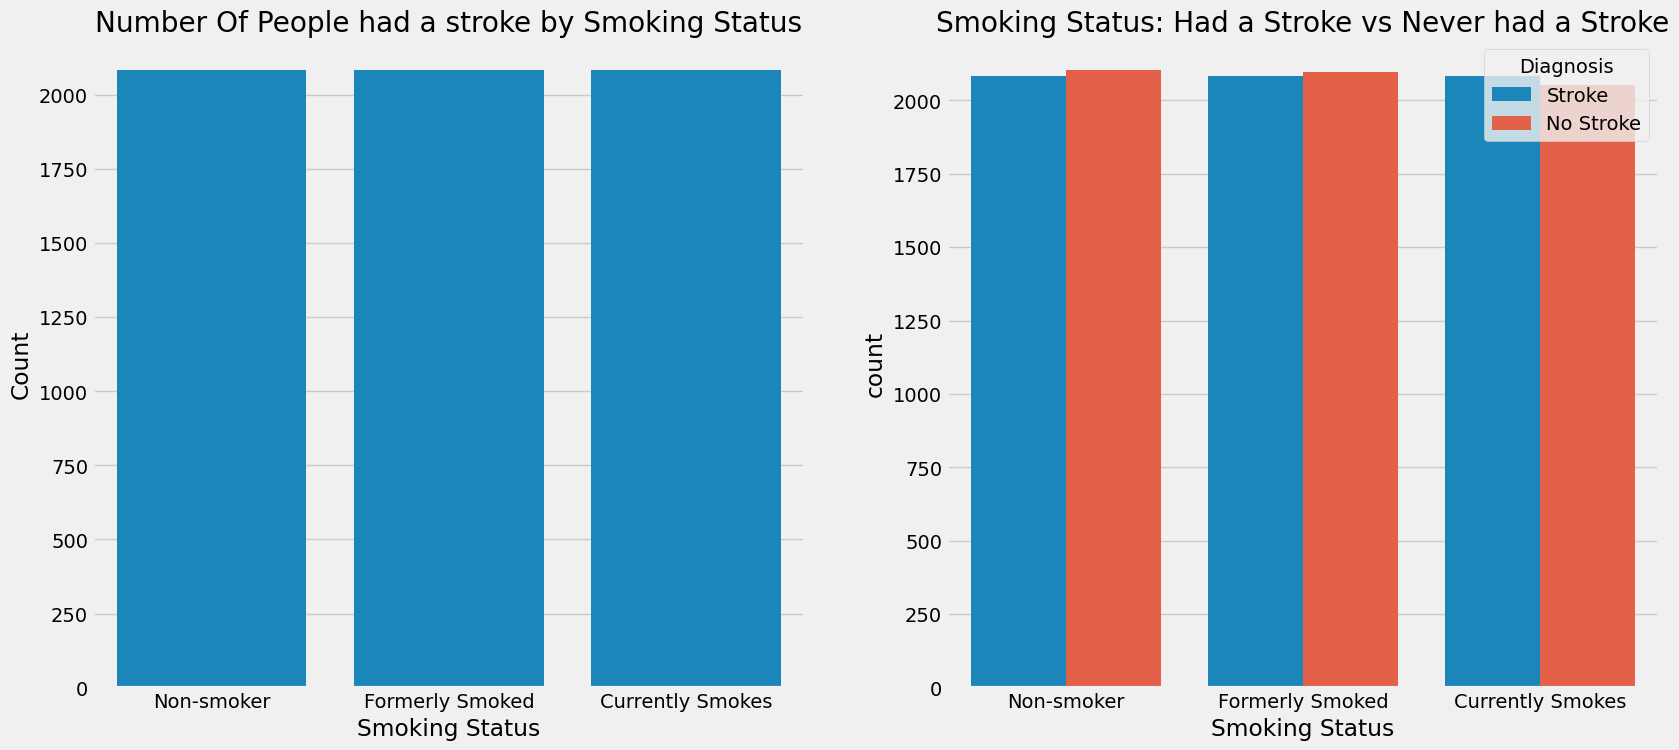

In [ ]:


f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Bar plot showing the number of people who had a stroke by smoking status
sns.countplot(x='Smoking Status', data=data[data['Diagnosis'] == 'Stroke'], ax=ax[0])
ax[0].set_title('Number Of People had a stroke by Smoking Status')
ax[0].set_ylabel('Count')

# Countplot showing the distribution of Diagnosis for each Smoking Status
sns.countplot(x='Smoking Status', hue='Diagnosis', data=data, ax=ax[1])
ax[1].set_title('Smoking Status: Had a Stroke vs Never had a Stroke')

plt.show()


In [ ]:
pd.crosstab([data['Gender'], data['Diagnosis']], data['Smoking Status'], margins=True).style.background_gradient(cmap='summer_r')

<Figure size 1800x800 with 0 Axes>

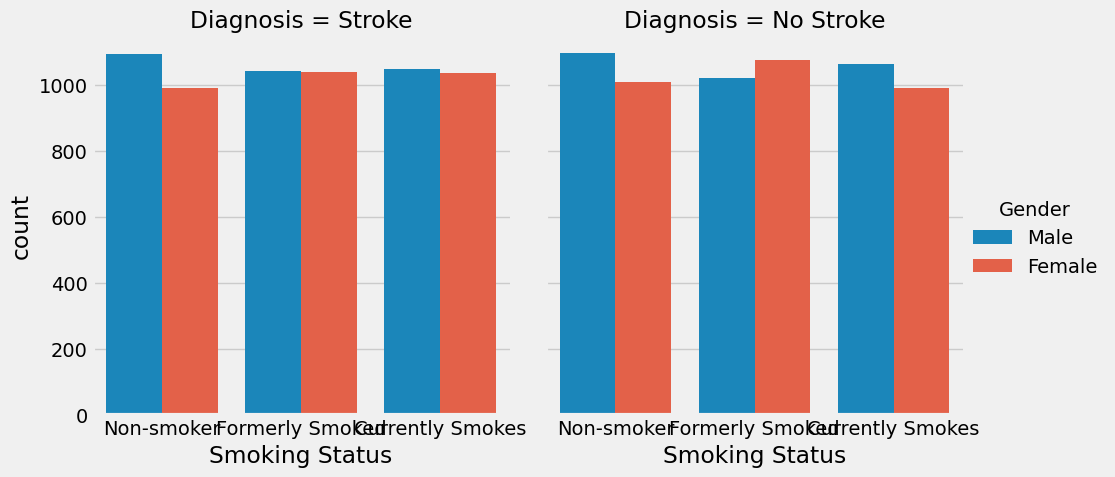

In [ ]:
plt.figure(figsize=(18, 8))
sns.catplot(x='Smoking Status', hue='Gender', data=data, kind='count', col='Diagnosis')
plt.show()

In [ ]:
# See the min, max, mean values
print('Oldest Person was of:',data['Age'].max(),'Years')
print('Youngest Person was of:',data['Age'].min(),'Years')
print('Average Age in the data:',data['Age'].mean(),'Years')

Oldest Person was of: 90 Years
Youngest Person was of: 18 Years
Average Age in the data: 53.99216 Years


In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Violin plot for Smoking Status and Age vs Had a stroke
sns.violinplot(x="Smoking Status", y="Age", hue="Diagnosis", split=True, ax=ax[0], data=data)
ax[0].set_title('Smoking Status and Age vs Had a Stroke')
ax[0].set_yticks(range(0, 110, 10))

# Violin plot for Gender and Age vs Had a stroke
sns.violinplot(x="Gender", y="Age", hue="Diagnosis", split=True, ax=ax[1], data=data)
ax[1].set_title('Gender and Age vs Had a Stroke')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

In [ ]:
print('Maximum "Average Glucose Level" in data:',data['Average Glucose Level'].max())
print('Minimum "Average Glucose Level" in data:',data['Average Glucose Level'].min())
print('Average "Average Glucose Level" in data:',data['Average Glucose Level'].mean())
print("***************************************")
print('Maximum "BMI" in data:',data['Body Mass Index (BMI)'].max())
print('Minimum "BMI" in data:',data['Body Mass Index (BMI)'].min())
print('Average "BMI" in data:',data['Body Mass Index (BMI)'].mean())
print("***************************************")
print('Maximum "Stress Levels" in data:',data['Stress Levels'].max())
print('Minimum "Stress Levels" in data:',data['Stress Levels'].min())
print('Average Stress Levels" in data:',data['Stress Levels'].mean())

Maximum "Average Glucose Level" in data: 200.0
Minimum "Average Glucose Level" in data: 60.0
Average "Average Glucose Level" in data: 129.58755599999998
***************************************
Maximum "BMI" in data: 40.0
Minimum "BMI" in data: 15.01
Average "BMI" in data: 27.530263200000004
***************************************
Maximum "Stress Levels" in data: 10.0
Minimum "Stress Levels" in data: 0.0
Average Stress Levels" in data: 5.0192496


**2. Data Cleaning**

We need to convert the continous values into categorical values by either Binning or Normalisation. Binning and normalisation both will be used in this section i.e group a range of ages into a single bin or assign them a single value.

In [ ]:
data.insert(2,'age_band', np.zeros)

In [ ]:
data.loc[data['Age']<=20,'age_band']=0
data.loc[(data['Age']>20)&(data['Age']<=32),'age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'age_band']=3
data.loc[data['Age']>64,'age_band']=4
data.drop(columns= "Age", inplace=True)
data["age_band"]=data['age_band'].astype(str).astype(int)
data.head()

,Gender,age_band,Hypertension,Heart Disease,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Diagnosis
0,Male,3,0,1,130.91,22.37,Non-smoker,Social Drinker,Moderate,0,Yes,3.48,140/108,"HDL: 68, LDL: 133",Stroke
1,Male,4,0,0,183.73,32.57,Non-smoker,Never,Low,0,No,1.73,146/91,"HDL: 63, LDL: 70",Stroke
2,Male,1,1,1,189.00,20.32,Formerly Smoked,Rarely,High,0,Yes,7.31,154/97,"HDL: 59, LDL: 95",Stroke
3,Male,4,0,0,185.29,27.50,Non-smoker,Frequent Drinker,Moderate,0,No,5.35,174/81,"HDL: 70, LDL: 137",No Stroke
4,Male,3,1,1,177.34,29.06,Currently Smokes,Rarely,Low,0,Yes,6.84,121/95,"HDL: 65, LDL: 68",Stroke


In [ ]:

data.head()

In [ ]:
data['age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of people in each band

,age_band
4,4444
2,2762
3,2743
1,2046
0,505


normalize the continious features "Average Glucose Level","Stress Levels" and "Body Mass Index (BMI)".



In [ ]:
# copy the data
data = data.copy()

# apply normalization techniques on Columns
column = 'Average Glucose Level'
column2 = 'Body Mass Index (BMI)'
column3 ='Stress Levels'
data[column] = data[column] /data[column].abs().max()
data[column2] = data[column2] /data[column2].abs().max()
data[column3] = data[column3] /data[column3].abs().max()

# view normalized data
display(data[column], data[column2],data[column3])

0        0.65455
1        0.91865
2        0.94500
3        0.92645
4        0.88670
          ...   
14994    0.41345
14996    0.53790
14997    0.67450
14998    0.84710
14999    0.93440
Name: Average Glucose Level, Length: 12500, dtype: float64

0        0.55925
1        0.81425
2        0.50800
3        0.68750
4        0.72650
          ...   
14994    0.92050
14996    0.55425
14997    0.65950
14998    0.70800
14999    0.98250
Name: Body Mass Index (BMI), Length: 12500, dtype: float64

0        0.348
1        0.173
2        0.731
3        0.535
4        0.684
         ...  
14994    0.869
14996    0.147
14997    0.051
14998    0.153
14999    0.457
Name: Stress Levels, Length: 12500, dtype: float64

In [ ]:
data['Gender'].replace(['Male','Female'],[0,1],inplace=True)
data['Gender'].head()

0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: int64

In [ ]:
# What was the smoking status variables
data["Smoking Status"].unique()

array(['Non-smoker', 'Formerly Smoked', 'Currently Smokes'], dtype=object)

In [ ]:
data['Smoking Status'].replace(['Non-smoker', 'Formerly Smoked', 'Currently Smokes'],[0,1,2],inplace=True)
data['Smoking Status'].head()
data.head()

,Gender,age_band,Hypertension,Heart Disease,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Diagnosis
0,0,3,0,1,0.65455,0.55925,0,Social Drinker,Moderate,0,Yes,0.348,140/108,"HDL: 68, LDL: 133",Stroke
1,0,4,0,0,0.91865,0.81425,0,Never,Low,0,No,0.173,146/91,"HDL: 63, LDL: 70",Stroke
2,0,1,1,1,0.94500,0.50800,1,Rarely,High,0,Yes,0.731,154/97,"HDL: 59, LDL: 95",Stroke
3,0,4,0,0,0.92645,0.68750,0,Frequent Drinker,Moderate,0,No,0.535,174/81,"HDL: 70, LDL: 137",No Stroke
4,0,3,1,1,0.88670,0.72650,2,Rarely,Low,0,Yes,0.684,121/95,"HDL: 65, LDL: 68",Stroke


In [ ]:
data["Alcohol Intake"].unique()

array(['Social Drinker', 'Never', 'Rarely', 'Frequent Drinker'],
      dtype=object)

In [ ]:
data['Alcohol Intake'].replace([ 'Never', 'Rarely','Social Drinker','Frequent Drinker'],[0,1,2,3],inplace=True)
data['Alcohol Intake'].head()
data.head()

,Gender,age_band,Hypertension,Heart Disease,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Diagnosis
0,0,3,0,1,0.65455,0.55925,0,2,Moderate,0,Yes,0.348,140/108,"HDL: 68, LDL: 133",Stroke
1,0,4,0,0,0.91865,0.81425,0,0,Low,0,No,0.173,146/91,"HDL: 63, LDL: 70",Stroke
2,0,1,1,1,0.94500,0.50800,1,1,High,0,Yes,0.731,154/97,"HDL: 59, LDL: 95",Stroke
3,0,4,0,0,0.92645,0.68750,0,3,Moderate,0,No,0.535,174/81,"HDL: 70, LDL: 137",No Stroke
4,0,3,1,1,0.88670,0.72650,2,1,Low,0,Yes,0.684,121/95,"HDL: 65, LDL: 68",Stroke


In [ ]:
data["Physical Activity"].unique()

array(['Moderate', 'Low', 'High'], dtype=object)

In [ ]:
data['Physical Activity'].replace([ 'Low', 'Moderate','High'],[0,1,2],inplace=True)
data['Physical Activity'].head()
data.head()

,Gender,age_band,Hypertension,Heart Disease,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Diagnosis
0,0,3,0,1,0.65455,0.55925,0,2,1,0,Yes,0.348,140/108,"HDL: 68, LDL: 133",Stroke
1,0,4,0,0,0.91865,0.81425,0,0,0,0,No,0.173,146/91,"HDL: 63, LDL: 70",Stroke
2,0,1,1,1,0.94500,0.50800,1,1,2,0,Yes,0.731,154/97,"HDL: 59, LDL: 95",Stroke
3,0,4,0,0,0.92645,0.68750,0,3,1,0,No,0.535,174/81,"HDL: 70, LDL: 137",No Stroke
4,0,3,1,1,0.88670,0.72650,2,1,0,0,Yes,0.684,121/95,"HDL: 65, LDL: 68",Stroke


In [ ]:
data["Family History of Stroke"].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
data['Family History of Stroke'].replace(['Yes', 'No'],[0,1],inplace=True)
data['Family History of Stroke'].head()
data.head()

,Gender,age_band,Hypertension,Heart Disease,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Diagnosis
0,0,3,0,1,0.65455,0.55925,0,2,1,0,0,0.348,140/108,"HDL: 68, LDL: 133",Stroke
1,0,4,0,0,0.91865,0.81425,0,0,0,0,1,0.173,146/91,"HDL: 63, LDL: 70",Stroke
2,0,1,1,1,0.94500,0.50800,1,1,2,0,0,0.731,154/97,"HDL: 59, LDL: 95",Stroke
3,0,4,0,0,0.92645,0.68750,0,3,1,0,1,0.535,174/81,"HDL: 70, LDL: 137",No Stroke
4,0,3,1,1,0.88670,0.72650,2,1,0,0,0,0.684,121/95,"HDL: 65, LDL: 68",Stroke


In [ ]:
data['Diagnosis'].replace(['Stroke', 'No Stroke'],[0,1],inplace=True)
data['Diagnosis'].head()

0    0
1    0
2    0
3    1
4    0
Name: Diagnosis, dtype: int64

In [ ]:
# Assuming 'Blood Pressure Levels' is the column name
data['Systolic BP'] = data['Blood Pressure Levels'].apply(lambda x: int(x.split('/')[0]))
data['Diastolic BP'] = data['Blood Pressure Levels'].apply(lambda x: int(x.split('/')[1]))
data.drop('Blood Pressure Levels', axis=1, inplace=True)
data.head()

,Gender,age_band,Hypertension,Heart Disease,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Stress Levels,Cholesterol Levels,Diagnosis,Systolic BP,Diastolic BP
0,0,3,0,1,0.65455,0.55925,0,2,1,0,0,0.348,"HDL: 68, LDL: 133",0,140,108
1,0,4,0,0,0.91865,0.81425,0,0,0,0,1,0.173,"HDL: 63, LDL: 70",0,146,91
2,0,1,1,1,0.94500,0.50800,1,1,2,0,0,0.731,"HDL: 59, LDL: 95",0,154,97
3,0,4,0,0,0.92645,0.68750,0,3,1,0,1,0.535,"HDL: 70, LDL: 137",1,174,81
4,0,3,1,1,0.88670,0.72650,2,1,0,0,0,0.684,"HDL: 65, LDL: 68",0,121,95


In [ ]:
# Min-Max Scaling
data['Systolic BP'] = (data['Systolic BP'] - data['Systolic BP'].min()) / (data['Systolic BP'].max() - data['Systolic BP'].min())
data['Diastolic BP'] = (data['Diastolic BP'] - data['Diastolic BP'].min()) / (data['Diastolic BP'].max() - data['Diastolic BP'].min())


In [ ]:
data.head()

,Gender,age_band,Hypertension,Heart Disease,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Stress Levels,Cholesterol Levels,Diagnosis,Systolic BP,Diastolic BP
0,0,3,0,1,0.65455,0.55925,0,2,1,0,0,0.348,"HDL: 68, LDL: 133",0,0.555556,0.96
1,0,4,0,0,0.91865,0.81425,0,0,0,0,1,0.173,"HDL: 63, LDL: 70",0,0.622222,0.62
2,0,1,1,1,0.94500,0.50800,1,1,2,0,0,0.731,"HDL: 59, LDL: 95",0,0.711111,0.74
3,0,4,0,0,0.92645,0.68750,0,3,1,0,1,0.535,"HDL: 70, LDL: 137",1,0.933333,0.42
4,0,3,1,1,0.88670,0.72650,2,1,0,0,0,0.684,"HDL: 65, LDL: 68",0,0.344444,0.70


In [ ]:
data['HDL'] = data['Cholesterol Levels'].apply(lambda x: int(x.split(', ')[0].split(': ')[1]))
data['LDL'] = data['Cholesterol Levels'].apply(lambda x: int(x.split(', ')[1].split(': ')[1]))

# Drop the original 'Cholesterol Levels' column if needed
data.drop('Cholesterol Levels', axis=1, inplace=True)


In [ ]:
# Min-Max Scaling
data['HDL'] = (data['HDL'] - data['HDL'].min()) / (data['HDL'].max() - data['HDL'].min())
data['LDL'] = (data['LDL'] - data['LDL'].min()) / (data['LDL'].max() - data['LDL'].min())


In [ ]:
data.head()

,Gender,age_band,Hypertension,Heart Disease,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Stress Levels,Diagnosis,Systolic BP,Diastolic BP,HDL,LDL
0,0,3,0,1,0.65455,0.55925,0,2,1,0,0,0.348,0,0.555556,0.96,0.76,0.561538
1,0,4,0,0,0.91865,0.81425,0,0,0,0,1,0.173,0,0.622222,0.62,0.66,0.076923
2,0,1,1,1,0.94500,0.50800,1,1,2,0,0,0.731,0,0.711111,0.74,0.58,0.269231
3,0,4,0,0,0.92645,0.68750,0,3,1,0,1,0.535,1,0.933333,0.42,0.80,0.592308
4,0,3,1,1,0.88670,0.72650,2,1,0,0,0,0.684,0,0.344444,0.70,0.70,0.061538


In [ ]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [ ]:
# Assuming your dataset is named 'df'
# Replace 'df' with the actual variable name of your dataset
df=data
# Split the dataset into features (X) and target variable (Y)
X = df.drop('Diagnosis', axis=1)  # Features
Y = df['Diagnosis']  # Target variable

# Split the dataset into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=df['Diagnosis'])

# Display the lengths of training and testing sets
len(train_X), len(train_Y), len(test_X), len(test_Y)

(8750, 8750, 3750, 3750)

In [ ]:
print(train_X)

       Gender  age_band  Hypertension  Heart Disease  Average Glucose Level  \
1834        1         3             0              1                0.46615   
11099       0         2             1              1                0.96235   
6790        1         2             0              0                0.92945   
14695       1         0             0              1                0.55175   
8019        0         2             0              0                0.54140   
...       ...       ...           ...            ...                    ...   
528         0         1             0              0                0.55950   
7226        1         2             0              1                0.40120   
5936        1         1             0              0                0.50770   
5125        1         4             0              1                0.85985   
13282       1         1             1              0                0.69550   

       Body Mass Index (BMI)  Smoking Status  Alcoh

In [ ]:
print(train_Y)

1834     1
11099    0
6790     1
14695    0
8019     0
        ..
528      0
7226     1
5936     1
5125     0
13282    0
Name: Diagnosis, Length: 8750, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

In [ ]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.496


In [ ]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.5056


In [ ]:
from sklearn.metrics import accuracy_score

# Assuming train_X_scaled and test_X_scaled have been scaled as suggested earlier

# Train the RandomForestClassifier model
ensemble_model = RandomForestClassifier(n_estimators=100, random_state=0)
ensemble_model.fit(train_X_scaled, train_Y)

# Make predictions on the test set
predictions = ensemble_model.predict(test_X_scaled)

# Calculate and display the accuracy
accuracy = accuracy_score(test_Y, predictions)
print('Accuracy for RandomForestClassifier is:', accuracy)

Accuracy for RandomForestClassifier is: 0.49866666666666665
